# Understanding Descriptive Statistics

Import the necessary libraries here:

In [175]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [7]:
def roll_dice(n=10):
    return [random.choice(range(1,7)) for i in range(n)]
result = roll_dice()

#### 2.- Plot the results sorted by value.

[1, 2, 2, 3, 4, 5, 5, 6, 6, 6]


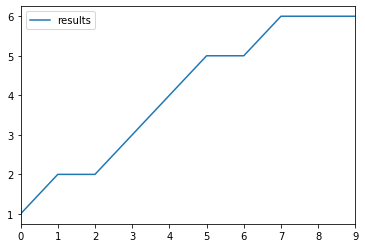

In [8]:
result.sort()
print(result)
df = pd.DataFrame(result, columns = ['results'])
df.plot()

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

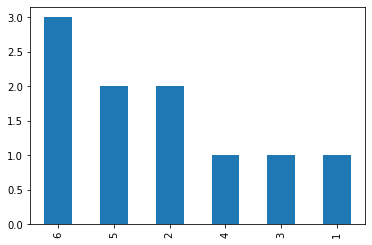

In [9]:
df.results.value_counts().plot(kind='bar')

In both plots, it can be appreciated how many outcomes of each number we got

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [10]:
def mean(df):
    return df.sum() / len(df)

mean(df)

results    4.0
dtype: float64

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [11]:
frec = df.results.value_counts()
frec

6    3
5    2
2    2
4    1
3    1
1    1
Name: results, dtype: int64

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [134]:
def median(lst):
    if len(lst) % 2 == 1:
        return lst[int(len(lst)/2 - 0.5)]
    else:
        return (lst[int(len(lst)/2)] + lst[int(len(lst)/2 - 1)]) /2

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [165]:
def quartiles(lst):
    return (sorted(lst)[int(len(lst) * x)-1] for x in [0.25, 0.5, 0,75, 1])
#I keep trying it this way, but I can't make it work... I wanted to do it in one line...

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [136]:
dice_hundred = pd.read_csv('../data/roll_the_dice_hundred.csv', index_col = [0])
dice_hundred

roll  value
0      0      1
1      1      2
2      2      6
3      3      1
4      4      6
..   ...    ...
95    95      4
96    96      6
97    97      1
98    98      3
99    99      6

[100 rows x 2 columns]

Dataframe with 2 values, the rolling number and its result

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [137]:
mean(dice_hundred.value)

3.74

#### 3.- Now, calculate the frequency distribution.


In [138]:
frec = dice_hundred.value.value_counts()
frec

6    23
4    22
2    17
3    14
5    12
1    12
Name: value, dtype: int64

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

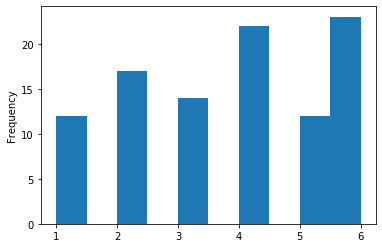

In [139]:
dice_hundred.value.plot(kind='hist')

It can be clearly seen that the mean will be higher than expected, since the average value should be 3.5 but thanks to the histogram we can appreciate that the most frequent values are 4 and 6. Pushing the mean higher than expected.

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

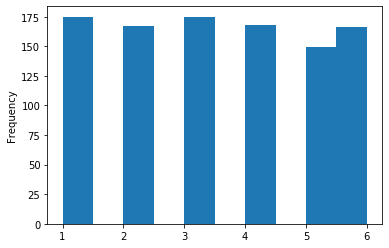

In [140]:
dice_thousand = pd.read_csv('../data/roll_the_dice_thousand.csv', index_col = [0])
dice_thousand.value.plot(kind='hist')

The frequency its much more even. This is due to having a bigger sample and all the numbers having the same probability.

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

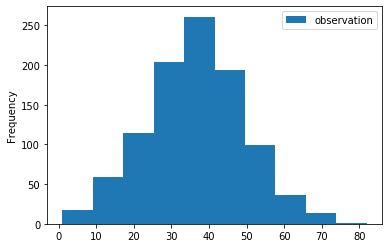

In [141]:
population = pd.read_csv('../data/ages_population.csv')
frec = pd.DataFrame(population['observation'].value_counts())
population.plot.hist()

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [142]:
population.describe()


observation
count    1000.0000
mean       36.5600
std        12.8165
min         1.0000
25%        28.0000
50%        37.0000
75%        45.0000
max        82.0000

I expected the mean to be under 40 and the standard deviation to be around 15 since 68% of the values should fall in there.

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

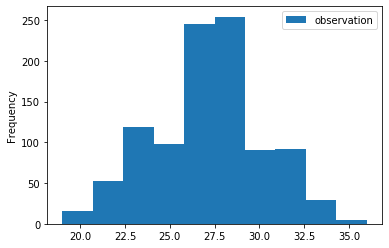

In [131]:
population2 = pd.read_csv('../data/ages_population2.csv')
frec = pd.DataFrame(population2['observation'].value_counts())
population2.plot.hist()

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

Lower standard deviation since the range of ages is much lower and most of it is concentred in the middle


#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [132]:
population2.describe()

observation
count  1000.000000
mean     27.155000
std       2.969814
min      19.000000
25%      25.000000
50%      27.000000
75%      29.000000
max      36.000000

I expected the mean to be around 27.5, since a high amount of the values are near it and the one from the side are pretty evened.
I also expected a low standard deviation since the age ranges are quite short.

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

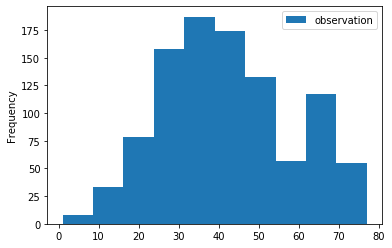

In [148]:
population3 = pd.read_csv('../data/ages_population3.csv')
frec = pd.DataFrame(population3['observation'].value_counts())
population3.plot.hist()

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [149]:
population3.describe()

observation
count  1000.000000
mean     41.989000
std      16.144706
min       1.000000
25%      30.000000
50%      40.000000
75%      53.000000
max      77.000000

Higher mean due to the peak of values around the age 70. Therefore, higher standard deviation.

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [171]:
population3.quantile([0.25, 0.5, 0.75, 1])

observation
0.25         30.0
0.50         40.0
0.75         53.0
1.00         77.0

The mean and the median are similar. The dataset is a little bit skewd to the right

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [178]:
percentiles = population3.quantile(np.arange(0.1, 1, 0.1))
percentiles

observation
0.1         22.0
0.2         28.0
0.3         32.0
0.4         36.0
0.5         40.0
0.6         45.0
0.7         50.0
0.8         57.0
0.9         67.0

Seeing how is the data distributed every 10% gives us a better idea of how it is distributed

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""